In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

In [2]:
dataset = pd.read_csv("D:\Artificial Neural Network\MENTAL PROJ\Database\Mental health Data\Mental Health Data.csv")
dataset.head(n=5) #show only 5 rows

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,1 to 5,1.0,NaN,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Sometimes,Often,33,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1,0,1 to 5,1.0,NaN,No,No,No,I don't know,Very easy,Yes,...,Not applicable to me,Not applicable to me,40,male,Netherlands,NaN,Netherlands,NaN,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,NaN,Yes,Yes,No,I don't know,I don't know,Maybe,...,Not applicable to me,Not applicable to me,21,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin,Never
3,0,1 to 5,1.0,NaN,No,No,No,No,Very difficult,No,...,Often,Often,36,Male,Brazil,NaN,Brazil,NaN,Back-end Developer,Never
4,0,1 to 5,0.0,1.0,I don't know,No,Yes,No,Very difficult,Yes,...,Not applicable to me,Often,36,F,United States of America,Indiana,United States of America,Indiana,Other,Sometimes


In [3]:
dataset.shape

(1433, 31)

In [4]:
## Rename the columns
a=list(dataset.columns)
b=['self_employed','no_of_employees','tech_company','role_IT','mental_healthcare_coverage',
  'knowledge_about_mental_healthcare_options_workplace','employer_discussed_mental_health',
  'employer_offer_resources_to_learn_about_mental_health','medical_leave_from_work',
  'comfortable_discussing_with_coworkers','employer_take_mental_health_seriously',
   'knowledge_of_local_online_resources ','productivity_affected_by_mental_health ',
   'percentage_work_time_affected_mental_health','openess_of_family_friends',
  'family_history_mental_illness','mental_health_disorder_past',
   'currently_mental_health_disorder','diagnosed_mental_health_condition',
   'type_of_disorder','treatment_from_professional',
   'while_effective_treatment_mental_health_issue_interferes_work',
  'while_not_effective_treatment_interferes_work','age','gender','country','US state',
  'country work ','US state work','role_in_company','work_remotely','']
for i,j in zip(a,b):
    dataset.rename(columns={i:j},inplace=True)
dataset

,self_employed,no_of_employees,tech_company,role_IT,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,...,while_effective_treatment_mental_health_issue_interferes_work,while_not_effective_treatment_interferes_work,age,gender,country,US state,country work,US state work,role_in_company,work_remotely
0,0,1 to 5,1.0,NaN,Yes,Yes,No,No,Somewhat difficult,Maybe,...,Sometimes,Often,33,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1,0,1 to 5,1.0,NaN,No,No,No,I don't know,Very easy,Yes,...,Not applicable to me,Not applicable to me,40,male,Netherlands,NaN,Netherlands,NaN,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,NaN,Yes,Yes,No,I don't know,I don't know,Maybe,...,Not applicable to me,Not applicable to me,21,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin,Never
3,0,1 to 5,1.0,NaN,No,No,No,No,Very difficult,No,...,Often,Often,36,Male,Brazil,NaN,Brazil,NaN,Back-end Developer,Never
4,0,1 to 5,0.0,1.0,I don't know,No,Yes,No,Very difficult,Yes,...,Not applicable to me,Often,36,F,United States of America,Indiana,United States of America,Indiana,Other,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Often,Often,29,Male,Canada,NaN,Canada,NaN,One-person shop|Designer|Front-end Developer|B...,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,m,Germany,NaN,Germany,NaN,One-person shop,Sometimes
1430,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,29,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin|Supervisor/...,Always
1431,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes


In [5]:
## information of Dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 31 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   self_employed                                                  1433 non-null   int64  
 1   no_of_employees                                                1146 non-null   object 
 2   tech_company                                                   1146 non-null   float64
 3   role_IT                                                        263 non-null    float64
 4   mental_healthcare_coverage                                     1146 non-null   object 
 5   knowledge_about_mental_healthcare_options_workplace            1013 non-null   object 
 6   employer_discussed_mental_health                               1146 non-null   object 
 7   employer_offer_resources_to_learn_about_mental_health       

In [6]:
## No of Missing values in different Columns
columns=dataset.columns
pd.DataFrame({'no of missing values':dataset.isnull().sum()})

,no of missing values
self_employed,0
no_of_employees,287
tech_company,287
role_IT,1170
mental_healthcare_coverage,287
knowledge_about_mental_healthcare_options_workplace,420
employer_discussed_mental_health,287
employer_offer_resources_to_learn_about_mental_health,287
medical_leave_from_work,287
comfortable_discussing_with_coworkers,287


In [7]:
## copy the dataset in df1
df1 = dataset.copy()

In [8]:
## Drop the unnecessary colums 
cols = ['role_IT','knowledge_of_local_online_resources ',
        'productivity_affected_by_mental_health ',
        'percentage_work_time_affected_mental_health']
df_red = df1.drop(cols,axis=1)
df_red.head(n=3) #จะเห็นว่าคอลัมน์ที่ไม่จำเป็นโดนตัดไปแล้ว

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,...,while_effective_treatment_mental_health_issue_interferes_work,while_not_effective_treatment_interferes_work,age,gender,country,US state,country work,US state work,role_in_company,work_remotely
0,0,1 to 5,1.0,Yes,Yes,No,No,Somewhat difficult,Maybe,I don't know,...,Sometimes,Often,33,Male,Canada,NaN,Canada,NaN,Back-end Developer,Sometimes
1,0,1 to 5,1.0,No,No,No,I don't know,Very easy,Yes,I don't know,...,Not applicable to me,Not applicable to me,40,male,Netherlands,NaN,Netherlands,NaN,Front-end Developer|Back-end Developer,Sometimes
2,0,1 to 5,1.0,Yes,Yes,No,I don't know,I don't know,Maybe,I don't know,...,Not applicable to me,Not applicable to me,21,male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer|DevOps/SysAdmin,Never


Cleaning Different Columns

In [9]:
## No of Employees column
df_red.no_of_employees.unique()

array(['1 to 5', '6 to 25', '26-99', '100-500', '26-100', '500-1000',
       'More than 1000', nan], dtype=object)

In [10]:
df_red.no_of_employees.replace(to_replace=['1 to 5', '6 to 25','More than 1000','26-99'],
                                value=['1-5','6-25','>1000','26-100'],inplace=True)

In [11]:
df_red.no_of_employees.value_counts()

26-100      326
>1000       256
100-500     248
6-25        176
500-1000     80
1-5          60
Name: no_of_employees, dtype: int64

In [12]:
## Cleaning Mental Health Care coverage column
df_red.mental_healthcare_coverage.unique()

array(['Yes', 'No', "I don't know", 'Not eligible for coverage / N/A',
       nan], dtype=object)

In [13]:
df_red.mental_healthcare_coverage.replace(to_replace=['Not eligible for coverage / N/A'],
                                value='No',inplace=True)
df_red.mental_healthcare_coverage.unique()

array(['Yes', 'No', "I don't know", nan], dtype=object)

In [14]:
## Cleaning openess_of_family_friends column
df_red.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       'Not applicable to me (I do not have a mental illness)',
       'Not open at all'], dtype=object)

In [15]:
#Replace "Not applicable to me" into "I don't know"
df_red.openess_of_family_friends.replace(to_replace=['Not applicable to me (I do not have a mental illness)']
                                          ,value="I don't know",inplace=True)
df_red.openess_of_family_friends.unique()

array(['Somewhat open', 'Very open', 'Somewhat not open', 'Neutral',
       "I don't know", 'Not open at all'], dtype=object)

In [16]:
## Cleaning the age column remove outliers
med_age = df_red[(df_red['age'] >= 18) | (df_red['age'] <= 75)]['age'].median()
df_red['age'].replace(to_replace = df_red[(df_red['age'] < 18) | (df_red['age'] > 75)]['age'].tolist(), value = med_age, inplace = True)

In [17]:
## Cleaning the gender column
df_red.gender.unique()

array(['Male', 'male', 'F', 'Transitioned, M2F', 'Other/Transfeminine',
       'M', 'female', 'm', 'Female', 'f', 'non-binary', 'woman', 'male ',
       'Male ', 'Bigender', 'Genderfluid (born female)',
       'male 9:1 female, roughly', 'Male (cis)', 'Other', 'Sex is male',
       'genderqueer', 'Human', 'mail', 'Cis-woman',
       'female-bodied; no feelings about gender', 'Transgender woman',
       'Genderfluid', 'female ', 'Male/genderqueer', 'fem', 'Nonbinary',
       ' Female', 'Female ', 'Genderqueer', nan, 'I identify as female.',
       'fm', 'Cis female ', 'female/woman', 'Androgynous', 'man',
       'nb masculine', 'Cisgender Female', 'Woman', 'Cis Male',
       'Female or Multi-Gender Femme', 'Male.', 'Enby', 'Agender',
       'Female (props for making this a freeform field, though)',
       'cis man', 'Female assigned at birth ', 'Cis male', 'Man',
       'none of your business', 'cis male', 'genderqueer woman', 'Queer',
       'Dude', 'Male (trans, FtM)', 'cisdude', 'Gen

In [18]:
#Change many different genders into three types of data
df_red['gender'].replace(to_replace = ['Male', 'male', 'Male ', 'M', 'm',
       'man', 'Cis male', 'Male.', 'male 9:1 female, roughly', 'Male (cis)', 'Man', 'Sex is male',
       'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'male ',
       'Cis Male', 'Male (trans, FtM)',
       'cisdude', 'cis man', 'MALE'], value = 'male', inplace = True)
df_red['gender'].replace(to_replace = ['Female', 'female', 'I identify as female.', 'female ',
       'Female assigned at birth ', 'F', 'Woman', 'fm', 'f', 'Cis female ', 'Transitioned, M2F',
       'Genderfluid (born female)', 'Female or Multi-Gender Femme', 'Female ', 'woman', 'female/woman',
       'Cisgender Female', 'fem', 'Female (props for making this a freeform field, though)',
       ' Female', 'Cis-woman', 'female-bodied; no feelings about gender',
       'AFAB'], value = 'female', inplace = True)
df_red['gender'].replace(to_replace = ['Bigender', 'non-binary', 'Other/Transfeminine',
       'Androgynous', 'Other', 'nb masculine',
       'none of your business', 'genderqueer', 'Human', 'Genderfluid',
       'Enby', 'genderqueer woman', 'mtf', 'Queer', 'Agender', 'Fluid',
       'Nonbinary', 'human', 'Unicorn', 'Genderqueer',
       'Genderflux demi-girl', 'Transgender woman'], value = 'other', inplace = True)

In [19]:
df_red.gender.unique()

array(['male', 'female', 'other', nan], dtype=object)

In [20]:
## Cleaning the role_in_company
tech_list = []
tech_list.append(df_red[df_red['role_in_company'].str.contains('Back-end')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('Front-end')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('Dev')]['role_in_company'].tolist())
tech_list.append(df_red[df_red['role_in_company'].str.contains('DevOps')]['role_in_company'].tolist())
flat_list = [item for sublist in tech_list for item in sublist]
flat_list = list(dict.fromkeys(flat_list))

In [21]:
## Replace tech role=1 and other=0 in a new tech role operation
df_red['tech_role']=df_red['role_in_company']
df_red['tech_role'].replace(to_replace=flat_list,value=1,inplace=True)
remain_list=df_red['tech_role'].unique()[1:]
df_red['tech_role'].replace(to_replace=remain_list,value=0,inplace=True)

In [22]:
df_red.tech_role.value_counts()

1    1045
0     388
Name: tech_role, dtype: int64

In [23]:
df_red=df_red.drop(['role_in_company'],axis=1)
df_red.head(n=3) #role_in_compamy หายไปแล้ว

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,...,while_effective_treatment_mental_health_issue_interferes_work,while_not_effective_treatment_interferes_work,age,gender,country,US state,country work,US state work,work_remotely,tech_role
0,0,1-5,1.0,Yes,Yes,No,No,Somewhat difficult,Maybe,I don't know,...,Sometimes,Often,33.0,male,Canada,NaN,Canada,NaN,Sometimes,1
1,0,1-5,1.0,No,No,No,I don't know,Very easy,Yes,I don't know,...,Not applicable to me,Not applicable to me,40.0,male,Netherlands,NaN,Netherlands,NaN,Sometimes,1
2,0,1-5,1.0,Yes,Yes,No,I don't know,I don't know,Maybe,I don't know,...,Not applicable to me,Not applicable to me,21.0,male,United Kingdom,NaN,United Kingdom,NaN,Never,1


Handling Missing Values

In [24]:
df_rej=pd.concat([df_red['type_of_disorder'],df_red['US state'],df_red['US state work']],axis=1) #ทำการนำ 3 คอลัมน์นี้มาต่อหัวกันให้เป็น 1 คอลัมน์
df_red=df_red.drop(['type_of_disorder','US state','US state work'],axis=1) #ดรอปสามคอลัมน์นี้ไปแล้ว
df_red.head(n=3)

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,...,diagnosed_mental_health_condition,treatment_from_professional,while_effective_treatment_mental_health_issue_interferes_work,while_not_effective_treatment_interferes_work,age,gender,country,country work,work_remotely,tech_role
0,0,1-5,1.0,Yes,Yes,No,No,Somewhat difficult,Maybe,I don't know,...,Yes,1,Sometimes,Often,33.0,male,Canada,Canada,Sometimes,1
1,0,1-5,1.0,No,No,No,I don't know,Very easy,Yes,I don't know,...,Yes,1,Not applicable to me,Not applicable to me,40.0,male,Netherlands,Netherlands,Sometimes,1
2,0,1-5,1.0,Yes,Yes,No,I don't know,I don't know,Maybe,I don't know,...,No,0,Not applicable to me,Not applicable to me,21.0,male,United Kingdom,United Kingdom,Never,1


In [25]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #ใช้ SimpleImputer มาแทนที่ค่าที่ nan ด้วยค่าที่พบบ่อยสุดในคอมลัมน์นั้น ๆ (most_frequent)
imp.fit(df_red)
imp_data=pd.DataFrame(data=imp.transform(df_red),columns=df_red.columns)

In [26]:
df_eda=pd.concat([imp_data,df_rej],axis=1)
df_eda.isnull().sum().to_frame() #returns the number of missing values in the data set. 


,0
self_employed,0
no_of_employees,0
tech_company,0
mental_healthcare_coverage,0
knowledge_about_mental_healthcare_options_workplace,0
employer_discussed_mental_health,0
employer_offer_resources_to_learn_about_mental_health,0
medical_leave_from_work,0
comfortable_discussing_with_coworkers,0
employer_take_mental_health_seriously,0


EDA

([<matplotlib.patches.Wedge at 0x1dfd77c2c10>,
 [Text(-0.018092161764598828, 1.0998512052467295, 'No'),
  Text(0.01809216176459845, -1.0998512052467295, 'Yes')],
 [Text(-0.00986845187159936, 0.5999188392254888, '50.523561%'),
  Text(0.009868451871599154, -0.5999188392254888, '49.476439%')])

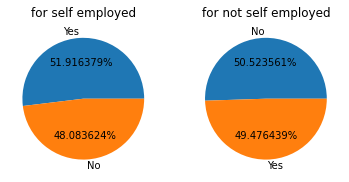

In [27]:
## A.1 "If a person is self employed then is there a higher chance of mental disorder?"
plt.subplot(1,2,1)
plt.title("for self employed")
plt.pie(df_eda[df_eda.self_employed==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("for not self employed")
plt.pie(df_eda[df_eda.self_employed==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==0]['diagnosed_mental_health_condition'].value_counts().index)

Text(0.5, 1.0, 'Mental health in different size companies')

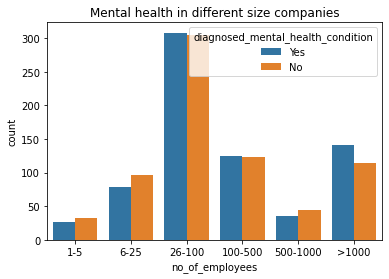

In [28]:
##A.2 "Does big size of the company affect your mental health condition adversely?"
sns.countplot(data=df_eda,x='no_of_employees',hue='diagnosed_mental_health_condition')
plt.title('Mental health in different size companies')

([<matplotlib.patches.Wedge at 0x1dfd797a040>,
 [Text(-0.019708651065785975, 1.0998234263158642, 'Yes'),
  Text(0.019708754038686934, -1.0998234244706022, 'No')],
 [Text(-0.01075017330861053, 0.5999036870813804, '50.570345%'),
  Text(0.010750229475647417, -0.5999036860748739, '49.429658%')])

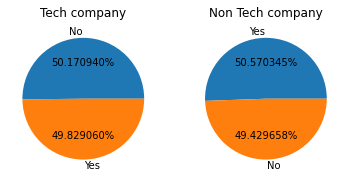

In [29]:
##A.3 "Does working in a tech company affect adversely to your mental well being?"
plt.subplot(1,2,1)
plt.title("Tech company")
plt.pie(df_eda[df_eda.tech_company==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Non Tech company")
plt.pie(df_eda[df_eda.tech_company==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_company==0]['diagnosed_mental_health_condition'].value_counts().index)

Text(0.5, 1.0, 'Mental health Discussion vs Daignostic Counts')

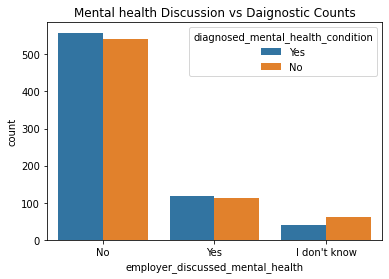

In [30]:
##A.4 "Does the employers discussion on mental health reduces the chance of getting postive diagonised?"
sns.countplot(data=df_eda,x='employer_discussed_mental_health',hue='diagnosed_mental_health_condition')
plt.title('Mental health Discussion vs Daignostic Counts')

Text(0.5, 1.0, 'Mental health Resource offering vs Daignostic Counts')

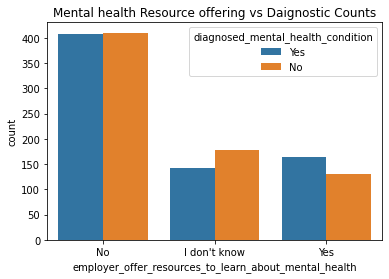

In [31]:
##A.5 "Will offering more options to learn about mental health reduces the chance of getting positive?"
sns.countplot(data=df_eda,x='employer_offer_resources_to_learn_about_mental_health',hue='diagnosed_mental_health_condition')
plt.title('Mental health Resource offering vs Daignostic Counts')

Text(0.5, 1.0, 'Asking for Leave vs Daignostic Counts')

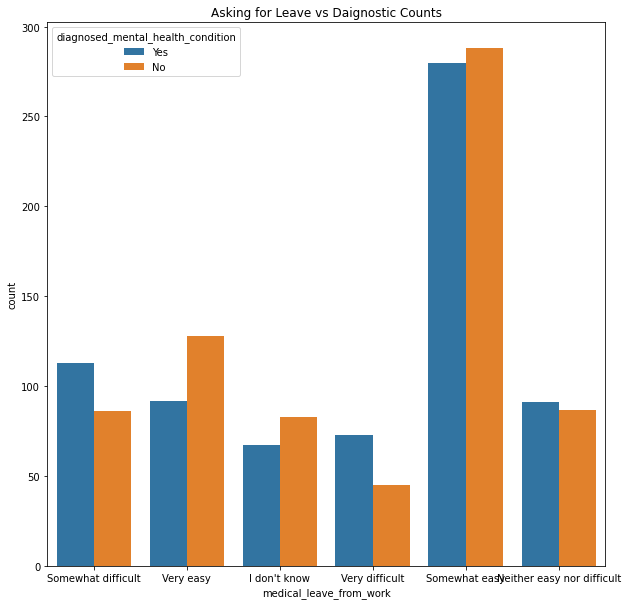

In [32]:
##A.6 "Does providing no leaves increases the less reporting of mental health issues?"
plt.figure(figsize=(10,10))
sns.countplot(data=df_eda,x='medical_leave_from_work',hue='diagnosed_mental_health_condition')
plt.title('Asking for Leave vs Daignostic Counts')

Text(0.5, 1.0, 'Discussion with co-workers vs Daignostic Counts')

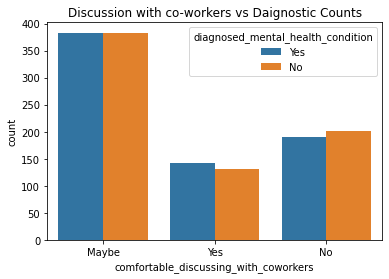

In [33]:
##A.7 "Does discussion with coworkers about mental health care reduces the chance of positive diagonosis?"
sns.countplot(data=df_eda,x='comfortable_discussing_with_coworkers',hue='diagnosed_mental_health_condition')
plt.title('Discussion with co-workers vs Daignostic Counts')

Text(0.5, 1.0, 'Employers seriousness vs Daignostic Counts')

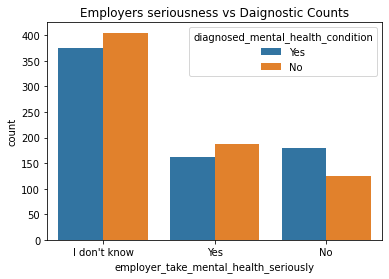

In [34]:
##A.8 "If Employer takes mental health seriously, then will it reduce the chance of positive diagonosis?"
sns.countplot(data=df_eda,x='employer_take_mental_health_seriously',hue='diagnosed_mental_health_condition')
plt.title('Employers seriousness vs Daignostic Counts')

Text(0.5, 1.0, 'Openess of Family&Friends vs Daignostic Counts')

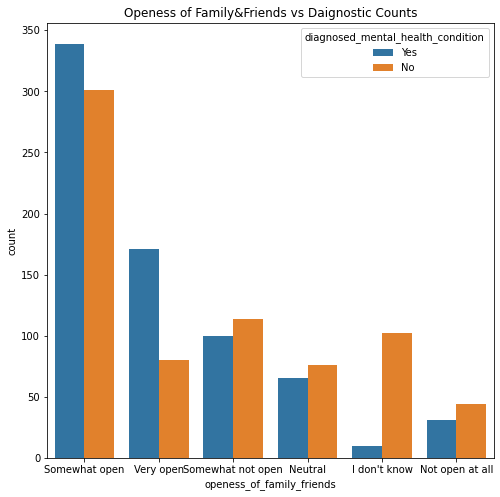

In [35]:
##A.9 "If family friends are open about the mental health then will it reduce the positive diagonosis?"
plt.figure(figsize=(8,8))
sns.countplot(data=df_eda,x='openess_of_family_friends',hue='diagnosed_mental_health_condition')
plt.title('Openess of Family&Friends vs Daignostic Counts')

Text(0.5, 1.0, 'Family History vs Daignostic Counts')

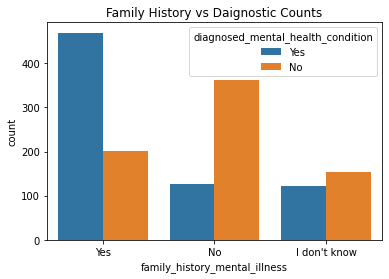

In [36]:
##A.10 "What are the chances that if a person having family history of mental illness then he is diagonised positive?"
sns.countplot(data=df_eda,x='family_history_mental_illness',hue='diagnosed_mental_health_condition')
plt.title('Family History vs Daignostic Counts')

([<matplotlib.patches.Wedge at 0x1dfd7ead940>,
 [Text(-1.0833623634614518, 0.19059378120814285, 'No'),
  Text(1.083362359000282, -0.19059380656606933, 'Yes')],
 [Text(-0.5909249255244282, 0.10396024429535064, '94.456762%'),
  Text(0.5909249230910628, -0.10396025812694691, '5.543237%')])

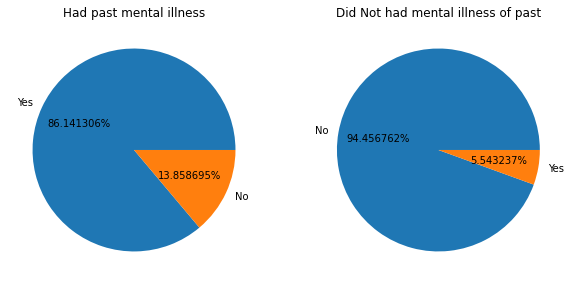

In [37]:
##A.11 "Does having mental illness of the past affect the diagonosis?"
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Had past mental illness")
plt.pie(df_eda[df_eda.mental_health_disorder_past=='Yes']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.mental_health_disorder_past=='Yes']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Did Not had mental illness of past")
plt.pie(df_eda[df_eda.mental_health_disorder_past=='No']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.mental_health_disorder_past=='No']['diagnosed_mental_health_condition'].value_counts().index)

Text(0.5, 1.0, 'Self proclaimed disorder vs Daignostic Counts')

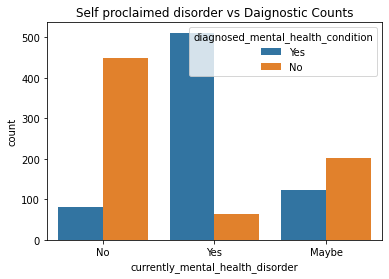

In [38]:
##A.12 "Is self proclaimed mental health disorders increases the chances of being diagonised positively?"
sns.countplot(data=df_eda,x='currently_mental_health_disorder',hue='diagnosed_mental_health_condition')
plt.title('Self proclaimed disorder vs Daignostic Counts')

([<matplotlib.patches.Wedge at 0x1dfd8f8a910>,
 [Text(-1.0754761146685294, 0.2309786283998678, 'No'),
  Text(1.0754761092620841, -0.23097865357320332, 'Yes')],
 [Text(-0.5866233352737433, 0.12598834276356424, '93.265992%'),
  Text(0.5866233323247732, -0.1259883564944745, '6.734007%')])

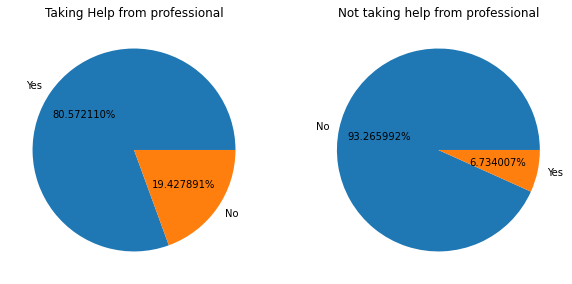

In [39]:
##A.13 "How many of those who has diagonised positively will seek help of professional?"
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Taking Help from professional")
plt.pie(df_eda[df_eda.treatment_from_professional==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.treatment_from_professional==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not taking help from professional")
plt.pie(df_eda[df_eda.treatment_from_professional==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.treatment_from_professional==0]['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1dfd902f520>,
 [Text(-0.387286831783129, 1.0295673411328599, 'Often'),
  Text(0.11082048010455826, -1.0944034087983259, 'Sometimes'),
  Text(1.0153415504745185, -0.4231802640483144, 'Rarely'),
  Text(1.0863057567337249, -0.1730312194003421, 'Not applicable to me'),
  Text(1.0997352976415675, -0.02413037756051461, 'Never')],
 [Text(-0.21124736279079762, 0.5615821860724689, '61.452514%'),
  Text(0.06044753460248632, -0.5969473138899958, '30.307263%'),
  Text(0.5538226638951919, -0.2308255985718078, '3.910615%'),
  Text(0.5925304127638499, -0.09438066512745932, '3.631285%'),
  Text(0.5998556168954003, -0.013162024123917057, '0.698324%')])

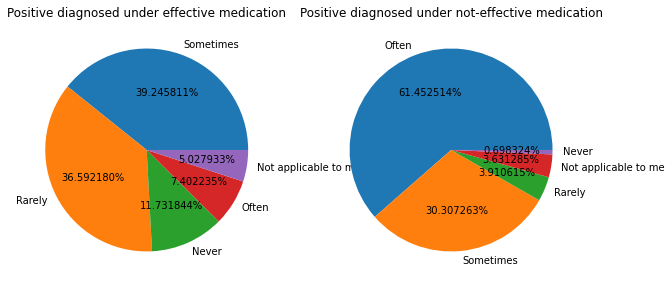

In [40]:
##A.14 "If one is diagonised positive how effective and not effective medication affecting the individual?"
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Positive diagnosed under effective medication")
plt.pie(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['while_effective_treatment_mental_health_issue_interferes_work'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['while_effective_treatment_mental_health_issue_interferes_work'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Positive diagnosed under not-effective medication")
plt.pie(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['while_not_effective_treatment_interferes_work'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['while_not_effective_treatment_interferes_work'].value_counts().index)

Text(0.5, 1.0, 'Negetive Diagonosis with age')

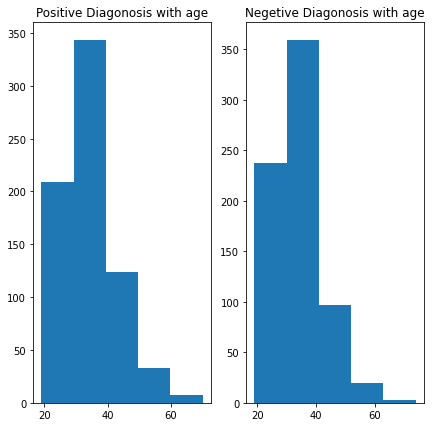

In [41]:
##A.15 "Is the chances of getting positively diagonised increases with age?"
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.hist(df_eda[df_eda.diagnosed_mental_health_condition=='Yes']['age'],bins=5)
plt.title("Positive Diagonosis with age")

plt.subplot(1,2,2)
plt.hist(df_eda[df_eda.diagnosed_mental_health_condition=='No']['age'],bins=5)
plt.title("Negetive Diagonosis with age")

([<matplotlib.patches.Wedge at 0x1dfd91e0eb0>,
 [Text(-0.9829959488654123, 0.49367900959448124, 'Yes'),
  Text(0.9829959950869729, -0.4936789175597559, 'No')],
 [Text(-0.536179608472043, 0.2692794597788079, '85.185188%'),
  Text(0.5361796336838033, -0.26927940957804863, '14.814815%')])

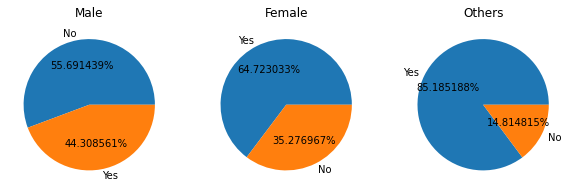

In [42]:
##A.16 "Is there any chance that a other gender category is more positively diagonised than other gender categories?"
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Male")
plt.pie(df_eda[df_eda.gender=='male']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.gender=='male']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,2)
plt.title("Female")
plt.pie(df_eda[df_eda.gender=='female']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.gender=='female']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,3)
plt.title("Others")
plt.pie(df_eda[df_eda.gender=='other']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.gender=='other']['diagnosed_mental_health_condition'].value_counts().index)

In [43]:
##A.17 ไม่ทำเพราะเป็นพล็อตแมพ

([<matplotlib.patches.Wedge at 0x1dfd9207070>,
 [Text(-0.03562008250107137, 1.0994231258813036, 'Yes'),
  Text(0.03562008250107123, -1.0994231258813039, 'No')],
 [Text(-0.01942913590967529, 0.5996853413898019, '51.030928%'),
  Text(0.019429135909675214, -0.599685341389802, '48.969072%')])

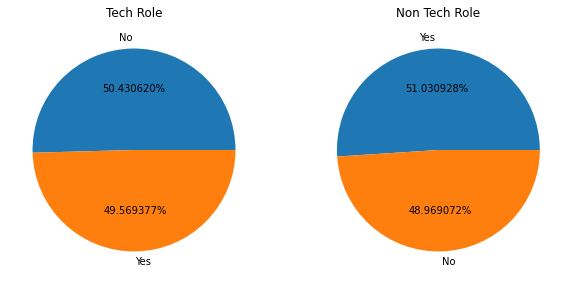

In [44]:
##A.20 "Does being involved in tech role increases chances of diagonised positive?"
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Tech Role")
plt.pie(df_eda[df_eda.tech_role==1]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_role==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Non Tech Role")
plt.pie(df_eda[df_eda.tech_role==0]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_role==0]['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1dfd931ae20>,
 [Text(-0.15000672147010105, 1.089723810657449, 'No'),
  Text(0.15000661944279384, -1.089723824702087, 'Yes')],
 [Text(-0.08182184807460056, 0.5943948058131538, '54.354352%'),
  Text(0.08182179242334207, -0.5943948134738656, '45.645645%')])

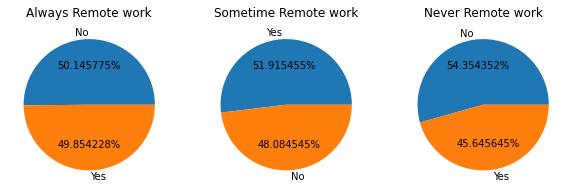

In [45]:
##A.21 "Will working remotely helps to better the mental health condition?"
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Always Remote work")
plt.pie(df_eda[df_eda.work_remotely=='Always']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.work_remotely=='Always']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,2)
plt.title("Sometime Remote work")
plt.pie(df_eda[df_eda.work_remotely=='Sometimes']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.work_remotely=='Sometimes']['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,3,3)
plt.title("Never Remote work")
plt.pie(df_eda[df_eda.work_remotely=='Never']['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.work_remotely=='Never']['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1dfd93ce6d0>,
 [Text(-0.06464257105613563, 1.0980989654886542, 'Yes'),
  Text(0.06464257105613574, -1.0980989654886542, 'No')],
 [Text(-0.03525958421243761, 0.5989630720847204, '51.871657%'),
  Text(0.035259584212437675, -0.5989630720847204, '48.128343%')])

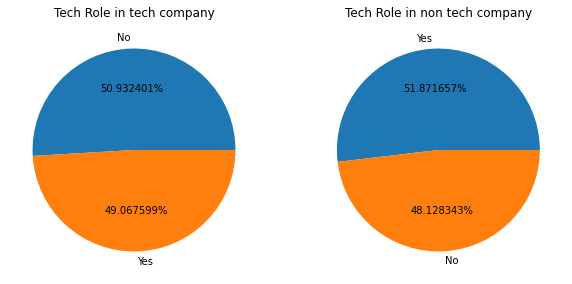

In [46]:
##A.22 "Does a person in tech role in tech company has higher chance of diagonosis than a tech role in non tech company?"
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Tech Role in tech company")
plt.pie(df_eda[(df_eda.tech_role==1) & (df_eda.tech_company==1)]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_role==1]['diagnosed_mental_health_condition'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Tech Role in non tech company")
plt.pie(df_eda[(df_eda.tech_role==1) & (df_eda.tech_company==0)]['diagnosed_mental_health_condition'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.tech_role==0]['diagnosed_mental_health_condition'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1dfd94646a0>,
 [Text(-0.030151117190896082, 1.0995866996886334, 'Yes'),
  Text(-0.5050235705581543, -0.9772160422243861, 'No'),
  Text(0.963006125356579, -0.5316194151135837, 'Maybe')],
 [Text(-0.01644606392230695, 0.5997745634665272, '50.872600%'),
  Text(-0.27546740212262955, -0.5330269321223924, '33.071554%'),
  Text(0.5252760683763158, -0.28997422642559106, '16.055846%')])

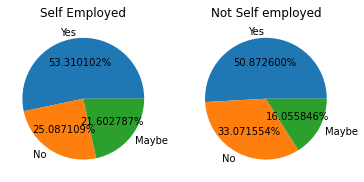

In [47]:
##B.1 "For self employed does the past mental disorder more than those who are not self employed?"
plt.subplot(1,2,1)
plt.title("Self Employed")
plt.pie(df_eda[df_eda.self_employed==1]['mental_health_disorder_past'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==1]['mental_health_disorder_past'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not Self employed")
plt.pie(df_eda[df_eda.self_employed==0]['mental_health_disorder_past'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==0]['mental_health_disorder_past'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1dfd94f9af0>,
 [Text(-0.25106860689769006, 1.0709643106240532, '1'),
  Text(0.2510687071686046, -1.0709642871173088, '0')],
 [Text(-0.1369465128532855, 0.5841623512494835, '57.329845%'),
  Text(0.13694656754651158, -0.584162338427623, '42.670158%')])

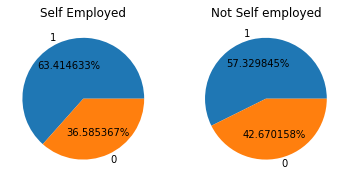

In [48]:
##B.2 "Does self employed people shy away to seek help?"
plt.subplot(1,2,1)
plt.title("Self Employed")
plt.pie(df_eda[df_eda.self_employed==1]['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==1]['treatment_from_professional'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not Self employed")
plt.pie(df_eda[df_eda.self_employed==0]['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.self_employed==0]['treatment_from_professional'].value_counts().index)

Text(0.5, 1.0, 'Company size vs Health care coverage')

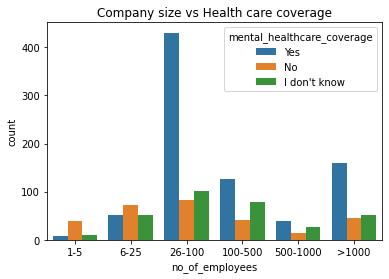

In [49]:
##B.3 "Is the large company is more serious about mental health than small companies?"
sns.countplot(data=df_eda,x='no_of_employees',hue='mental_healthcare_coverage')
plt.title('Company size vs Health care coverage')

Text(0.5, 1.0, 'Company size vs Openess about mental health')

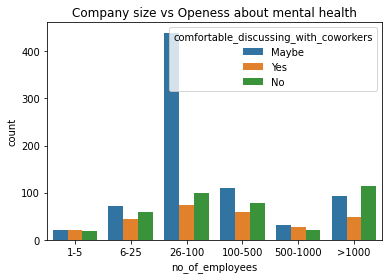

In [50]:
##B.4 "Does openess about the mental health varies with size of the companies?"
sns.countplot(data=df_eda,x='no_of_employees',hue='comfortable_discussing_with_coworkers')
plt.title('Company size vs Openess about mental health')

([<matplotlib.patches.Wedge at 0x1dfd96a3c10>,
 [Text(-0.44059807728808054, 1.0079054193177288, 'No'),
  Text(0.1506324301763201, -1.0896374952153474, 'Yes'),
  Text(1.058745387606376, -0.2984262123578033, "I don't know")],
 [Text(-0.24032622397531664, 0.5497665923551248, '63.117874%'),
  Text(0.08216314373253823, -0.5943477246629167, '28.136882%'),
  Text(0.5774974841489323, -0.16277793401334723, '8.745247%')])

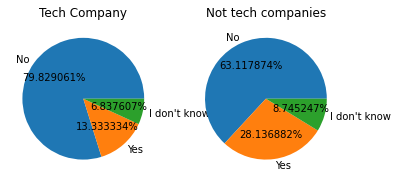

In [51]:
##B.5 "Does the tech companies take mental health seriously than other non tech companies?"
plt.subplot(1,2,1)
plt.title("Tech Company")
plt.pie(df_eda[df_eda.tech_company==1]['employer_discussed_mental_health'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['employer_discussed_mental_health'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Not tech companies")
plt.pie(df_eda[df_eda.tech_company==0]['employer_discussed_mental_health'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.tech_company==1]['employer_discussed_mental_health'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1dfd973bcd0>,
 [Text(-0.05834680990910332, 1.0984514781151833, '1'),
  Text(0.058346809909102695, -1.0984514781151833, '0')],
 [Text(-0.03182553267769272, 0.5991553516991909, '51.689190%'),
  Text(0.03182553267769238, -0.5991553516991909, '48.310810%')])

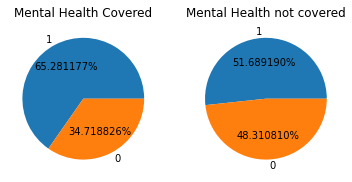

In [52]:
##B.6 "Does providing more health care benefits provide seeking for professional health?"
plt.subplot(1,2,1)
plt.title("Mental Health Covered")
plt.pie(df_eda[df_eda.mental_healthcare_coverage=='Yes']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.mental_healthcare_coverage=='Yes']['treatment_from_professional'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Mental Health not covered")
plt.pie(df_eda[df_eda.mental_healthcare_coverage=='No']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.mental_healthcare_coverage=='No']['treatment_from_professional'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1dfd97cde20>,
 [Text(-0.2840207786894458, 1.062700426871393, '1'),
  Text(0.2840207786894455, -1.062700426871393, '0')],
 [Text(-0.1549204247396977, 0.579654778293487, '58.312958%'),
  Text(0.1549204247396975, -0.5796547782934871, '41.687042%')])

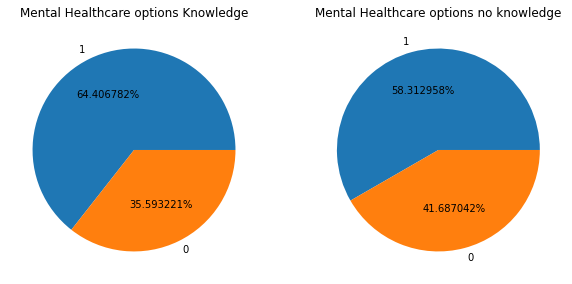

In [53]:
##B.7 "Does providing more information about mental health increase help seeking behaviour?"
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Mental Healthcare options Knowledge")
plt.pie(df_eda[df_eda.employer_offer_resources_to_learn_about_mental_health=='Yes']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.employer_offer_resources_to_learn_about_mental_health=='Yes']['treatment_from_professional'].value_counts().index)

plt.subplot(1,2,2)
plt.title("Mental Healthcare options no knowledge")
plt.pie(df_eda[df_eda.employer_offer_resources_to_learn_about_mental_health=='No']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.employer_offer_resources_to_learn_about_mental_health=='No']['treatment_from_professional'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1dfd987d550>,
 [Text(0.21807097813164583, 1.078167449191779, 'Somewhat open'),
  Text(-1.09854150500076, -0.05662651137643169, 'Very open'),
  Text(-0.6373633449424054, -0.8965310739309755, "I don't know"),
  Text(0.266419245583799, -1.0672491675248847, 'Somewhat not open'),
  Text(0.9165788254046539, -0.6081802831560928, 'Neutral'),
  Text(1.0908949119861056, -0.14123841900427447, 'Not open at all')],
 [Text(0.11894780625362497, 0.5880913359227885, '43.647540%'),
  Text(-0.5992044572731418, -0.03088718802350819, '14.344262%'),
  Text(-0.3476527336049484, -0.48901694941689566, '14.344262%'),
  Text(0.14531958850025398, -0.582135909559028, '13.114753%'),
  Text(0.4999520865843566, -0.3317346999033233, '10.450820%'),
  Text(0.5950335883560576, -0.07703913763869516, '4.098361%')])

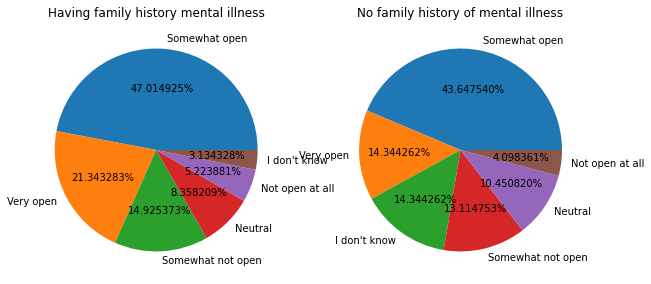

In [54]:
##B.8 "The family where there are history mental health isssues are they open about discussing among family?"
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Having family history mental illness")
plt.pie(df_eda[df_eda.family_history_mental_illness=='Yes']['openess_of_family_friends'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.family_history_mental_illness=='Yes']['openess_of_family_friends'].value_counts().index)
plt.subplot(1,2,2)
plt.title("No family history of mental illness")
plt.pie(df_eda[df_eda.family_history_mental_illness=='No']['openess_of_family_friends'].value_counts(),
       autopct='%1f%%',radius=1, 
       labels=df_eda[df_eda.family_history_mental_illness=='No']['openess_of_family_friends'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1dfd99763a0>,
 [Text(-0.02303663990543217, 1.0997587522824575, '0'),
  Text(0.02303663990543179, -1.0997587522824575, '1')],
 [Text(-0.012565439948417547, 0.5998684103358859, '50.666666%'),
  Text(0.012565439948417339, -0.5998684103358859, '49.333334%')])

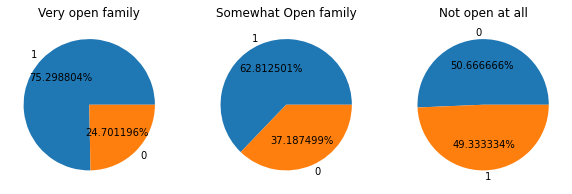

In [55]:
##B.9 "Does willing ness among family memebers increases the chance of seeking more professional help?"
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title("Very open family")
plt.pie(df_eda[df_eda.openess_of_family_friends=='Very open']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.openess_of_family_friends=='Very open']['treatment_from_professional'].value_counts().index)
plt.subplot(1,3,2)
plt.title("Somewhat Open family")
plt.pie(df_eda[df_eda.openess_of_family_friends=='Somewhat open']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.openess_of_family_friends=='Somewhat open']['treatment_from_professional'].value_counts().index)
plt.subplot(1,3,3)
plt.title("Not open at all")
plt.pie(df_eda[df_eda.openess_of_family_friends=='Not open at all']['treatment_from_professional'].value_counts(),
       autopct='%1f%%',radius=1,
       labels=df_eda[df_eda.openess_of_family_friends=='Not open at all']['treatment_from_professional'].value_counts().index)

<AxesSubplot:>

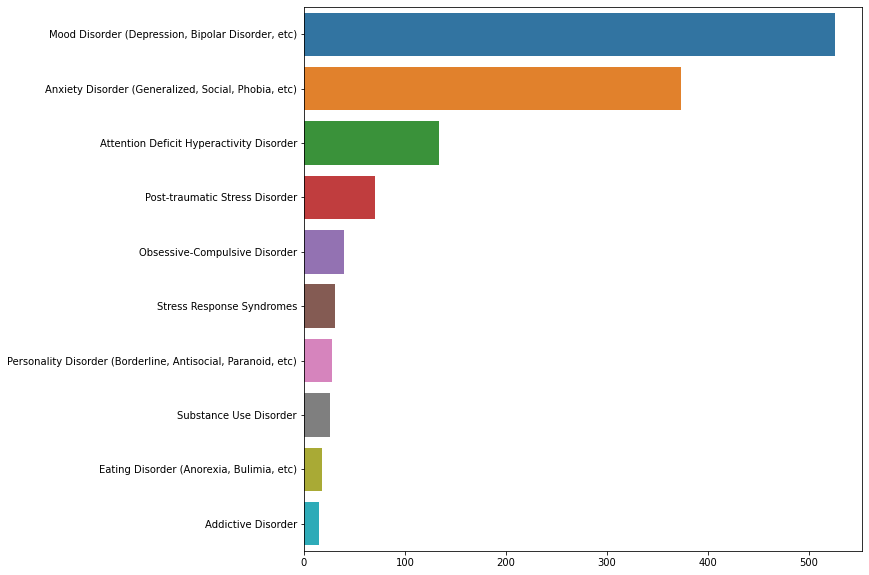

In [56]:
##B.10 "Which kind of discorder occur most?"
disorder_type=pd.DataFrame(
    df_eda[df_eda.type_of_disorder.isnull() != True]['type_of_disorder'].str.split("|").tolist()).stack()
plt.figure(figsize=(10,10))
sns.barplot(x=disorder_type.value_counts()[0:10],y=disorder_type.value_counts().index[0:10])

ML Models

Data Preperation

In [57]:
## Dropping unnecessary columns
y = df_eda.diagnosed_mental_health_condition
X = df_eda.drop(['diagnosed_mental_health_condition','treatment_from_professional',
               'while_effective_treatment_mental_health_issue_interferes_work',
               'while_not_effective_treatment_interferes_work','type_of_disorder','US state',
               'country', 'US state work', 'country work '],axis=1) #'country work ' NOT 'country work' นะ คือขี้เกียจไปแก้ละ

ต้องแปลงข้อมูลที่เป็น string ให้เป็น numerical (float or int) ก่อน

In [58]:
X.head(n=10) #มันยังเป็น string หลายคอลัมน์เลย แต่ไม่น่าจะมีคอลัมน์ไหนที่เป็น nan แล้ว

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,openess_of_family_friends,family_history_mental_illness,mental_health_disorder_past,currently_mental_health_disorder,age,gender,work_remotely,tech_role
0,0,1-5,1.0,Yes,Yes,No,No,Somewhat difficult,Maybe,I don't know,Somewhat open,Yes,Yes,No,33.0,male,Sometimes,1
1,0,1-5,1.0,No,No,No,I don't know,Very easy,Yes,I don't know,Very open,No,Yes,No,40.0,male,Sometimes,1
2,0,1-5,1.0,Yes,Yes,No,I don't know,I don't know,Maybe,I don't know,Somewhat open,No,No,No,21.0,male,Never,1
3,0,1-5,1.0,No,No,No,No,Very difficult,No,I don't know,Somewhat not open,Yes,Yes,Yes,36.0,male,Never,1
4,0,1-5,0.0,I don't know,No,Yes,No,Very difficult,Yes,I don't know,Somewhat open,I don't know,Maybe,Maybe,36.0,female,Sometimes,0
5,0,1-5,1.0,No,Yes,No,No,Very difficult,No,I don't know,Somewhat open,Yes,Yes,Yes,42.0,female,Always,1
6,0,1-5,1.0,No,No,Yes,I don't know,Very easy,Yes,Yes,Somewhat open,No,Yes,Maybe,26.0,other,Sometimes,1
7,0,1-5,1.0,No,No,No,No,Somewhat easy,Maybe,No,Somewhat open,No,No,No,29.0,male,Sometimes,1
8,0,1-5,1.0,Yes,No,No,No,Somewhat easy,Yes,I don't know,Somewhat open,Yes,Yes,Yes,30.0,female,Sometimes,1
9,0,1-5,0.0,No,Yes,Yes,No,Somewhat easy,Yes,No,Very open,Yes,No,No,36.0,male,Sometimes,1


In [59]:
X_conv = X.copy()

In [60]:
# Scaling Age
#scaler = MinMaxScaler()
#X_conv['age'] = scaler.fit_transform(X_conv[['age']])
#X_conv.head()

In [61]:
#ทีนี้มาเช็คค่า y บ้าง
print(y.dtypes) #พบว่าเป็น object อยู่


object


In [62]:
y.unique() 

array(['Yes', 'No'], dtype=object)

In [63]:
y_conv = y.copy()
y_conv

0       Yes
1       Yes
2        No
3        No
4        No
       ... 
1428    Yes
1429     No
1430     No
1431     No
1432    Yes
Name: diagnosed_mental_health_condition, Length: 1433, dtype: object

In [64]:
cat_columns=['self_employed', 'no_of_employees', 'tech_company',
       'mental_healthcare_coverage',
       'knowledge_about_mental_healthcare_options_workplace',
       'employer_discussed_mental_health',
       'employer_offer_resources_to_learn_about_mental_health',
       'medical_leave_from_work', 'comfortable_discussing_with_coworkers',
       'employer_take_mental_health_seriously', 'openess_of_family_friends',
       'family_history_mental_illness', 'mental_health_disorder_past',
       'currently_mental_health_disorder', 'age', 'gender', 'work_remotely', 'tech_role']

In [65]:
## Splitting the data
X_train, X_valid, y_train, y_valid = train_test_split(X_conv ,y_conv ,train_size=0.8,test_size=0.2,random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score

In [66]:
y_valid

1059    Yes
411     Yes
342     Yes
1295     No
483     Yes
       ... 
1045     No
1309    Yes
520     Yes
993     Yes
333     Yes
Name: diagnosed_mental_health_condition, Length: 287, dtype: object

In [67]:
##Label Encode the data 
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder() #บางเว็ปใช้ le
label_X_train=X_train.copy()
label_X_valid=X_valid.copy()

for col in cat_columns:
    label_X_train[col] = label_encode.fit_transform(X_train[col])
    label_X_valid[col] = label_X_valid[col].map(lambda s: '<unknown>' if s not in label_encode.classes_ else s)
    label_encode.classes_ = np.append(label_encode.classes_, '<unknown>')
    label_X_valid[col] = label_encode.fit_transform(label_X_valid[col]) #เพิ่ม fit_trandform เข้าไปแทน transform เฉยๆ

label_y_train=label_encode.fit_transform(y_train)
label_y_valid=label_encode.transform(y_valid)

In [68]:
#ลักษณะข้อมูลหลังจาก encode
label_X_valid

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,openess_of_family_friends,family_history_mental_illness,mental_health_disorder_past,currently_mental_health_disorder,age,gender,work_remotely,tech_role
1059,0,5,1,2,0,1,0,4,0,1,3,2,1,2,26,1,0,1
411,0,1,1,2,0,1,1,1,1,0,5,2,2,2,19,1,0,1
342,0,1,1,2,1,2,2,0,2,2,5,2,2,2,20,0,2,1
1295,1,2,1,2,1,1,1,3,0,0,5,2,0,0,23,1,0,0
483,0,1,1,2,2,1,1,3,0,0,5,2,2,2,8,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,0,5,0,2,2,0,0,1,0,1,4,1,1,1,16,1,0,0
1309,1,2,1,2,1,1,1,3,0,0,4,2,2,2,32,0,2,0
520,0,2,0,0,1,1,1,4,2,1,4,2,2,2,25,0,2,1
993,0,5,1,2,2,0,0,1,2,2,5,2,2,1,13,1,0,0


In [69]:
X_valid.to_excel("X_valid.xlsx")

In [70]:
print(label_X_valid.dtypes)

self_employed                                            int64
no_of_employees                                          int32
tech_company                                             int64
mental_healthcare_coverage                               int32
knowledge_about_mental_healthcare_options_workplace      int32
employer_discussed_mental_health                         int32
employer_offer_resources_to_learn_about_mental_health    int32
medical_leave_from_work                                  int32
comfortable_discussing_with_coworkers                    int32
employer_take_mental_health_seriously                    int32
openess_of_family_friends                                int32
family_history_mental_illness                            int32
mental_health_disorder_past                              int32
currently_mental_health_disorder                         int32
age                                                      int64
gender                                                 

In [71]:
label_y_valid #ผลลัพธ์จริงว่าป่วยหรือไม่

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1])

In [73]:
y_valid.to_excel("y_valid.xlsx")

In [74]:
from sklearn.ensemble import RandomForestClassifier #predict with improved accuracy 
model=RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(label_X_train,label_y_train)
preds=model.predict(label_X_valid)

In [75]:
preds #ผลลัพธ์ predict จาก RandomForestClassifier

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1])

In [76]:
#Decode ค่า prediction กลับเป็นภาษาคน
decoded_preds = label_encode.inverse_transform(preds)
decoded_preds

array(['Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', '

In [77]:
comparison = np.array(preds) == np.array(label_y_valid)
comparison

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [78]:
df = pd.DataFrame({'Actual Result': label_encode.inverse_transform(label_y_valid), 'Predicted Result': decoded_preds, 'Matched Result': comparison}) 
df.head(n=100)


,Actual Result,Predicted Result,Matched Result
0,Yes,Yes,True
1,Yes,Yes,True
2,Yes,Yes,True
3,No,No,True
4,Yes,Yes,True
...,...,...,...
95,Yes,Yes,True
96,Yes,Yes,True
97,Yes,Yes,True
98,Yes,No,False


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(label_y_valid,preds)

0.9233449477351916

In [80]:
X.head(n=3)

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,openess_of_family_friends,family_history_mental_illness,mental_health_disorder_past,currently_mental_health_disorder,age,gender,work_remotely,tech_role
0,0,1-5,1.0,Yes,Yes,No,No,Somewhat difficult,Maybe,I don't know,Somewhat open,Yes,Yes,No,33.0,male,Sometimes,1
1,0,1-5,1.0,No,No,No,I don't know,Very easy,Yes,I don't know,Very open,No,Yes,No,40.0,male,Sometimes,1
2,0,1-5,1.0,Yes,Yes,No,I don't know,I don't know,Maybe,I don't know,Somewhat open,No,No,No,21.0,male,Never,1


In [81]:
#สร้างตัวอย่างชุดข้อมูลภายนอก
putin = pd.read_csv('D:\Artificial Neural Network\MENTAL PROJ\Database\InputData.csv')
putin
#ส่งข้อมูล input เข้าระบบ clean ข้อมูล (คลีนแค่ให้ 1 to 5 เป็น 1-5)

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,openess_of_family_friends,family_history_mental_illness,mental_health_disorder_past,currently_mental_health_disorder,age,gender,work_remotely,tech_role
0,0,3,0,1,1,0,0,4,1,1,1,1,0,1,13,1,1,1
1,0,2,1,2,0,1,0,0,0,0,0,2,1,1,9,1,0,1
2,0,1,1,2,0,2,0,3,1,1,0,1,1,1,5,1,2,1
3,1,2,1,2,1,1,1,3,0,0,4,2,2,2,16,1,0,0
4,1,2,1,2,1,1,1,3,0,0,4,2,2,2,20,1,2,0
5,0,3,1,2,2,1,0,1,0,0,3,2,0,0,18,0,2,0
6,1,2,1,2,1,1,1,3,0,0,5,0,1,1,15,1,2,0
7,0,2,1,1,0,1,0,4,0,0,1,0,2,2,12,1,2,1
8,0,2,1,0,1,1,0,0,1,0,5,2,0,0,7,1,0,1


In [82]:
print(putin.dtypes)

self_employed                                            int64
no_of_employees                                          int64
tech_company                                             int64
mental_healthcare_coverage                               int64
knowledge_about_mental_healthcare_options_workplace      int64
employer_discussed_mental_health                         int64
employer_offer_resources_to_learn_about_mental_health    int64
medical_leave_from_work                                  int64
comfortable_discussing_with_coworkers                    int64
employer_take_mental_health_seriously                    int64
openess_of_family_friends                                int64
family_history_mental_illness                            int64
mental_health_disorder_past                              int64
currently_mental_health_disorder                         int64
age                                                      int64
gender                                                 

In [83]:
putin['no_of_employees'].replace(to_replace = ['1 to 5'], value = '1-5', inplace = True)
putin

,self_employed,no_of_employees,tech_company,mental_healthcare_coverage,knowledge_about_mental_healthcare_options_workplace,employer_discussed_mental_health,employer_offer_resources_to_learn_about_mental_health,medical_leave_from_work,comfortable_discussing_with_coworkers,employer_take_mental_health_seriously,openess_of_family_friends,family_history_mental_illness,mental_health_disorder_past,currently_mental_health_disorder,age,gender,work_remotely,tech_role
0,0,3,0,1,1,0,0,4,1,1,1,1,0,1,13,1,1,1
1,0,2,1,2,0,1,0,0,0,0,0,2,1,1,9,1,0,1
2,0,1,1,2,0,2,0,3,1,1,0,1,1,1,5,1,2,1
3,1,2,1,2,1,1,1,3,0,0,4,2,2,2,16,1,0,0
4,1,2,1,2,1,1,1,3,0,0,4,2,2,2,20,1,2,0
5,0,3,1,2,2,1,0,1,0,0,3,2,0,0,18,0,2,0
6,1,2,1,2,1,1,1,3,0,0,5,0,1,1,15,1,2,0
7,0,2,1,1,0,1,0,4,0,0,1,0,2,2,12,1,2,1
8,0,2,1,0,1,1,0,0,1,0,5,2,0,0,7,1,0,1


In [84]:
#ทดลอง predict ค่าที่ให้ไปจากภายนอก 
#ต้องทำระบบรับค่าภายนอก แล้ว encode ค่าภายนอกเป็นตัวเลข
#นำตัวเลขเข้า model, ทำการทำนายด้วย model.prdict
#decode ค่า predict 

In [85]:
new_preds=model.predict(putin)
new_preds

array([0, 0, 0, 1, 1, 1, 0, 1, 0])

In [86]:
decoded_new_preds = label_encode.inverse_transform(new_preds)
decoded_new_preds

array(['No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

สร้างระบบ input เพื่อสร้าง data list

data = 0	5	1	2	0	1	0	4	0	1	3	2	1	2	26	1	0	1
expected = 1 (Yes)

In [87]:
#ข้อมูลจำลอง 1 ชุด
#ต้องใช้ [[]] เท่านั้นนะ 
a = [[0, 5, 1, 2, 0, 1, 0, 4, 0, 1,	3,	2,	1,	2,	26,	1,	0,	1]]

In [88]:
A = new_preds=model.predict(a)
A

array([1])

In [89]:
decoded_A = label_encode.inverse_transform(A)
decoded_A
#ได้ yes = okay 

array(['Yes'], dtype=object)